# CS 109A/STAT 121A/AC 209A 

## Lab 2: Cleaning and EDA of Goodreads 

**Harvard University**<br>
**Fall 2017**<br>
**Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine**

---

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Goals

About 6000 odd "best books" were fetched and parsed from [Goodreads](https://www.goodreads.com). The "bestness" of these books came from a proprietary formula used by Goodreads and published as a list on their web site.

We parsed the page for each book and saved data from all these pages in a tabular format as a CSV file. In this lab we'll clean and further parse the data.  We'll then do some exploratory data analysis to answer questions about these best books and popular genres.  


By the end of this lab, you should be able to:

- Load and systematically address missing values, ancoded as `NaN` values in our data set, for example, by removing observations associated with these values.
- Parse columns in the dataframe to create new dataframe columns.
- Create and interpret visualizations to explore the data set

*This lab corresponds to lectures 2 and 3 and maps on to homework 1 and further.*

### Basic EDA workflow

(From the lecture, repeated here for convenience).

The basic workflow is as follows:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Report all the issues you found with the data and how you resolved them.  

[15 minutes]

----

Load the appropriate libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [2]:
#Read the data into a dataframe
df = pd.read_csv("data/goodreads.csv")

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
df.head()
####### 

,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.Suzanne_Collins,2008,/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
0,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
1,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
2,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
3,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
4,4.25,12363,0446675539,good_reads:book,https://www.goodreads.com/author/show/11081.Ma...,1936.0,/genres/classics|/genres/historical-fiction|/g...,dir01/18405.Gone_with_the_Wind.html,645470,Gone with the Wind


Lets read the csv file with custom column descriptions specified in the problem statement.

In [3]:
df=pd.read_csv("data/goodreads.csv", header=None,
               names=["rating", 'review_count', 'isbn', 'booktype',
                      'author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'])

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
df.head()
####### 

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [4]:
#Start by check the column data types
####### 
#   Insert your code
df.dtypes
####### 

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [5]:
#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
print(df.shape)
print(df.columns)
df.info()
####### 

(6000, 10)
Index([u'rating', u'review_count', u'isbn', u'booktype', u'author_url', u'year', u'genre_urls', u'dir', u'rating_count', u'name'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
rating          5998 non-null float64
review_count    6000 non-null object
isbn            5525 non-null object
booktype        6000 non-null object
author_url      6000 non-null object
year            5993 non-null float64
genre_urls      5938 non-null object
dir             6000 non-null object
rating_count    6000 non-null object
name            6000 non-null object
dtypes: float64(2), object(8)
memory usage: 468.8+ KB


Was the data read correctly and values represented as we expected?

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [6]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
df.rating.isnull().sum()
####### 

2

In [7]:
#Try to locate where the missing values occur
####### 
#   Insert your code
df[df.rating.isnull()]
####### 

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None


In [8]:
df.year.isnull().sum()

7

In [9]:
df[df.year.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [10]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
df = df[df.year.notnull()]
####### 

Ok so we have done some cleaning. Is it enough? 

In [11]:
#Check the column data types again
####### 
#   Insert your code
df.dtypes
####### 

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5993 entries, 0 to 5999
Data columns (total 10 columns):
rating          5993 non-null float64
review_count    5993 non-null object
isbn            5522 non-null object
booktype        5993 non-null object
author_url      5993 non-null object
year            5993 non-null float64
genre_urls      5934 non-null object
dir             5993 non-null object
rating_count    5993 non-null object
name            5993 non-null object
dtypes: float64(2), object(8)
memory usage: 515.0+ KB


Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [13]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
df.rating_count=df.rating_count.astype(int)
df.review_count=df.review_count.astype(int)
df.year=df.year.astype(int)
#######

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5993 entries, 0 to 5999
Data columns (total 10 columns):
rating          5993 non-null float64
review_count    5993 non-null int32
isbn            5522 non-null object
booktype        5993 non-null object
author_url      5993 non-null object
year            5993 non-null int32
genre_urls      5934 non-null object
dir             5993 non-null object
rating_count    5993 non-null int32
name            5993 non-null object
dtypes: float64(1), int32(3), object(6)
memory usage: 444.8+ KB


Final check

Some of the other colums that should be strings have NaN. 

In [15]:
df.loc[df.genre_urls.isnull(), 'genre_urls']=""
df.loc[df.isbn.isnull(), 'isbn']=""

In [16]:
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.
[5 min]

In [17]:
#Highest Rated books
df[df.rating == df.rating.max()].name

1718                           An Elephant Is On My House
2145                     A Book About Absolutely Nothing.
2903                Obscured Darkness (Family Secrets #2)
2909                                       Family Secrets
4473                                      Patience's Love
5564                 Untainted (Photographer Trilogy, #3)
5692    Abstraction In Theory - Laws Of Physical Trans...
Name: name, dtype: object

In [54]:
#Genre
def genre_get(x):
    z = x.split('|/')
    t = [x.split('/')[-1] for x in z]
    return t
#df['Genre'] = df.genre_urls.apply(genre_get)

In [56]:

#genre_list = list(df['Genre'])
#genre_set = []
#for x in genre_list:
    #genre_set.extend(x)
#print(set(genre_set))
#len(set(genre_set))  

set(['', 'poetry-plays', 'vampires', 'finnish-literature', 'mental-health', 'relationships', 'history-of-science', 'turkish', 'disability', 'animal-fiction', 'environment', 'culinary', 'horse-racing', 'hinduism', 'star-wars', 'horror', 'vegan', 'cult-classics', 'diary', 'storytime', '14th-century', 'high-fantasy', 'counter-culture', 'fae', 'school', 'judaism', 'gender', 'race', 'romantic-suspense', 'adult-fiction', 'new-age', 'non-fiction', 'middle-grade', 'gothic-romance', 'german-literature', 'design', 'medieval-romance', 'soldiers', 'read-for-school', '17th-century', 'plays', 'urbanism', 'cooking', 'fat', 'asia', 'womens-studies', 'international', 'post-colonial', 'teachers', 'iran', 'menage', 'russian-literature', 'childrens-classics', 'anthropology', 'china', 'political-science', 'tragedy', 'american-civil-war', 'ukraine', 'kids', 'high-school', 'technical', 'economics', 'comic-book', 'social', 'action', 'military', 'skepticism', 'criticism', 'love', 'family', 'egypt', 'presidents

538

---

In [62]:
#df['Fiction'] = df.Genre.apply(lambda x : 1 if 'fiction' in x else 0)
#df['Fantasy'] = df.Genre.apply(lambda x : 1 if 'fantasy' in x else 0)

In [64]:
#print df['Fiction'].sum()
#print df['Fantasy'].sum()
#print 'Fiction is more popular than fantacy'

4362
2742
Fiction is more popular than fantacy


In [68]:
#df.head(2)

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,Genre,Finction,Fiction,Fantasy
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)","[young-adult, science-fiction, dystopia, fanta...",0,0,1
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,"[fantasy, young-adult, fiction, fantasy, magic...",0,1,1


In [159]:
#df['author'] = df.author_url.apply(lambda x : x.split('.')[-1])

In [160]:
#auth_list1 = list(df['author'])

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  

[10 minutes]

---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [18]:
#Get the first author_url
test_string = df.author_url[0]
test_string

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [19]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
test_string.split('.')[-1]
####### 

'Suzanne_Collins'

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [20]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
def get_author(url):
    ####### 
    #   Insert your code
    name = url.split('.')[-1]
    ####### 
    return name

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.author[0:5]

0    Suzanne_Collins
1        J_K_Rowling
2    Stephenie_Meyer
3         Harper_Lee
4        Jane_Austen
Name: author, dtype: object

In [21]:
#Examine some examples of genre_urls

#Test out some string operations to isolate the genre name
####### 
#   Insert your code
test_genre_string=df.genre_urls[0]
genres=test_genre_string.strip().split('|/')
for e in genres:
    print(e.split('/')[-1])
    "|".join(genres)
####### 

young-adult
science-fiction
dystopia
fantasy
science-fiction
romance
adventure
book-club
young-adult
teen
apocalyptic
post-apocalyptic
action


In [22]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
def split_and_join_genres(url):
    ####### 
    #   Insert your code
    genres=url.strip().split('|/')
    genres=[e.split('/')[-1] for e in genres]
    return "|".join(genres)
    ####### 
    return genre

df['genres']=df.genre_urls.map(split_and_join_genres)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,classics|fiction|historical-fiction|academic|s...
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen,classics|fiction|romance|historical-fiction|li...


---

## Part 4: EDA 
Before proceeding any further, get to know the dataset using a few "global property" visualizations, illustrating histograms with both linear and log scales. Do you find anything interesting or strange? 


[10 minutes]

---

Choose some columns to generate histograms.

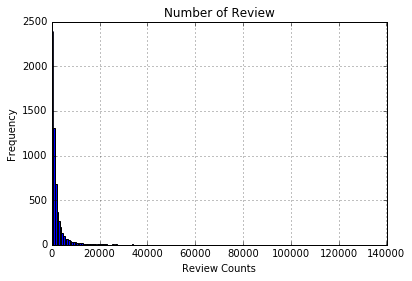

In [25]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)
df.review_count.hist(bins=200)
plt.xlabel('Review Counts')
plt.ylabel('Frequency')
plt.title('Number of Review')

plt.show()

If your histograms appear strange or counter-intuitive, make appropriate adjustments in the data and re-visualize.

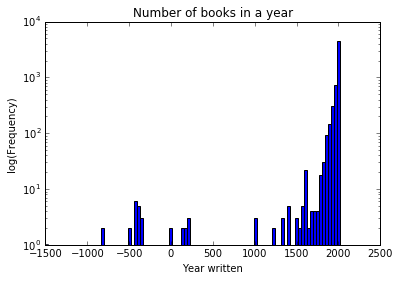

In [27]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

plt.hist(df.year, log=True, bins=100)
plt.xlabel('Year written')
plt.ylabel('log(Frequency)')
plt.title('Number of books in a year')
plt.show()

In [28]:
df[df.year < 0].name

47                               The Odyssey
246                    The Iliad/The Odyssey
455                             The Republic
596                               The Aeneid
629                              Oedipus Rex
674                           The Art of War
746                        The Bhagavad Gita
777                                 Antigone
1233                       The Oedipus Cycle
1397                          Aesop's Fables
1398                   The Epic of Gilgamesh
1428                                   Medea
1815                            The Oresteia
1882         The Trial and Death of Socrates
2078    The History of the Peloponnesian War
2527                           The Histories
3133                          Complete Works
3274                  The Nicomachean Ethics
3757                              Lysistrata
4402                           The Symposium
4475                                 Apology
5367                          Five Dialogues
Name: name


## Part 5:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book." (After all, these are all the best books according to Goodreads)

[5 minutes] 

---

For example, we can determine the "best book" by year! Determine the best books in each year.

In [39]:
#Using .groupby, we can divide the dataframe into subsets by the values of 'year'.
#We can then iterate over these subsets
for year, subset in df.groupby('year'):
    #Find the best book of the year
    ####### 
    #   Insert your code
    bestbook = subset[subset.rating == subset.rating.max()]
    if bestbook.shape[0] > 1:
        print(year, bestbook.name.values, bestbook.rating.values)
    else:
        print(year, bestbook.name.values[0], bestbook.rating.values[0])
    ####### 

(-1500, 'The Epic of Gilgamesh', 3.6000000000000001)
(-800, 'The Iliad/The Odyssey', 4.0099999999999998)
(-560, "Aesop's Fables", 4.0300000000000002)
(-512, 'The Art of War', 3.9199999999999999)
(-500, 'The Bhagavad Gita', 4.0599999999999996)
(-458, 'The Oresteia', 3.96)
(-442, 'Antigone', 3.52)
(-440, 'The Histories', 3.9399999999999999)
(-431, 'Medea', 3.7999999999999998)
(-429, 'Oedipus Rex', 3.6400000000000001)
(-411, 'The History of the Peloponnesian War', 3.8399999999999999)
(-400, 'Complete Works', 4.2999999999999998)
(-390, 'Apology', 4.1100000000000003)
(-380, 'The Republic', 3.8500000000000001)
(-370, 'The Symposium', 3.9900000000000002)
(-360, 'Five Dialogues', 4.0700000000000003)
(-350, 'The Nicomachean Ethics', 3.8799999999999999)
(-29, 'The Aeneid', 3.77)
(4, 'The Seven Spiritual Laws of Success', 4.04)
(8, 'Metamorphoses', 4.0099999999999998)
(13, 'The Day Jesus Rode Into Croydon', 3.8500000000000001)
(100, 'The New Oxford Annotated Bible, New Revised Standard Version', 

Try this for few other definitions of the "best book" using `.groupby`.

## Part 6:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?

[15 minutes]

---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

In [49]:
#Get the unique genres contained in the dataframe.
####### 
#   Insert your code
genres = set()
for genre_string in df.genres:
    genres.update(genre_string.split('|'))
genres = sorted(genres)
genres
####### 

['',
 '14th-century',
 '15th-century',
 '16th-century',
 '17th-century',
 '18th-century',
 '19th-century',
 '20th-century',
 'abuse',
 'academia',
 'academic',
 'action',
 'activism',
 'adolescence',
 'adoption',
 'adult',
 'adult-fiction',
 'adventure',
 'africa',
 'african-american',
 'african-american-literature',
 'african-literature',
 'aliens',
 'alternate-history',
 'american',
 'american-civil-war',
 'american-fiction',
 'american-history',
 'american-novels',
 'americana',
 'anarchism',
 'ancient',
 'angels',
 'animal-fiction',
 'animals',
 'anime',
 'anthologies',
 'anthropology',
 'anthropomorphic',
 'apocalyptic',
 'architecture',
 'art',
 'art-history',
 'arthurian',
 'asia',
 'asian-literature',
 'astronomy',
 'atheism',
 'australia',
 'autobiography',
 'bande-dessin%C3%A9e',
 'banned-books',
 'baseball',
 'basketball',
 'batman',
 'bdsm',
 'beauty-and-the-beast',
 'belgian',
 'belgium',
 'biography',
 'biography-memoir',
 'biology',
 'birds',
 'bizarro-fiction',
 'boardi

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [51]:
#Add a column for each genre
####### 
#   Insert your code
df.shape
for genre in genres:
    df["genre:"+genre] = [genre in g.split('|') for g in df.genres]
         
df.head()
####### 
df.shape

(5993, 550)

In [52]:
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres,genre:,genre:14th-century,genre:15th-century,genre:16th-century,genre:17th-century,genre:18th-century,genre:19th-century,genre:20th-century,genre:abuse,genre:academia,genre:academic,genre:action,genre:activism,genre:adolescence,genre:adoption,genre:adult,genre:adult-fiction,genre:adventure,genre:africa,genre:african-american,genre:african-american-literature,genre:african-literature,genre:aliens,genre:alternate-history,genre:american,genre:american-civil-war,genre:american-fiction,genre:american-history,genre:american-novels,genre:americana,genre:anarchism,genre:ancient,genre:angels,genre:animal-fiction,genre:animals,genre:anime,genre:anthologies,genre:anthropology,...,genre:time-travel-romance,genre:tragedy,genre:trans,genre:transgender,genre:travel,genre:travelogue,genre:true-crime,genre:true-story,genre:turkish,genre:turkish-literature,genre:ukraine,genre:unicorns,genre:united-states,genre:urban-fantasy,genre:urban-planning,genre:urbanism,genre:us-presidents,genre:utopia,genre:vampires,genre:vegan,genre:video-games,genre:walking,genre:war,genre:weird-fiction,genre:werewolves,genre:western,genre:western-romance,genre:wicca,genre:wilderness,genre:wildlife,genre:witches,genre:wizards,genre:wolves,genre:womens,genre:womens-fiction,genre:womens-studies,genre:world-history,genre:world-war-ii,genre:writing,genre:x-men,genre:young-adult,genre:young-adult-contemporary,genre:young-adult-fantasy,genre:young-adult-historical-fiction,genre:young-adult-paranormal,genre:young-adult-romance,genre:young-adult-science-fiction,genre:young-readers,genre:zen,genre:zombies
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,Fals

In [54]:
genreslist = ['genre:'+g for g in genres]
dfg = df[genreslist].sum()
dfg.sort_values(ascending=False)

genre:fiction                           4362
genre:fantasy                           2742
genre:romance                           2228
genre:young-adult                       2132
genre:literature                        1609
genre:classics                          1584
genre:novels                            1487
genre:contemporary                      1309
genre:adult                             1211
genre:paranormal                        1201
genre:adventure                         1177
genre:historical-fiction                1177
genre:mystery                           1031
genre:science-fiction                    981
genre:book-club                          919
genre:cultural                           871
genre:supernatural                       780
genre:european-literature                772
genre:magic                              755
genre:adult-fiction                      737
genre:science-fiction-fantasy            737
genre:childrens                          723
genre:urba

Now explore some ways to visualize the genres represented in the dataframe. 

For example, you might ask which is the most represented genre.

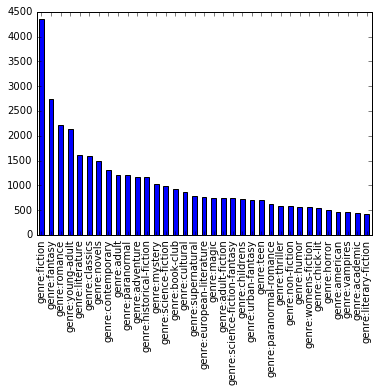

In [58]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
dfg.sort_values(ascending=False).iloc[0:35].plot(kind = "bar");
####### 

In [60]:
genres_wanted=dfg.index[dfg.values > 500]
print(genres_wanted.shape)
genres_wanted

(31L,)


Index([u'genre:adult', u'genre:adult-fiction', u'genre:adventure', u'genre:book-club', u'genre:chick-lit', u'genre:childrens', u'genre:classics', u'genre:contemporary', u'genre:cultural', u'genre:european-literature', u'genre:fantasy', u'genre:fiction', u'genre:historical-fiction', u'genre:horror', u'genre:humor', u'genre:literature', u'genre:magic', u'genre:mystery', u'genre:non-fiction', u'genre:novels', u'genre:paranormal', u'genre:paranormal-romance', u'genre:romance',
       u'genre:science-fiction', u'genre:science-fiction-fantasy', u'genre:supernatural', u'genre:teen', u'genre:thriller', u'genre:urban-fantasy', u'genre:womens-fiction', u'genre:young-adult'],
      dtype='object')

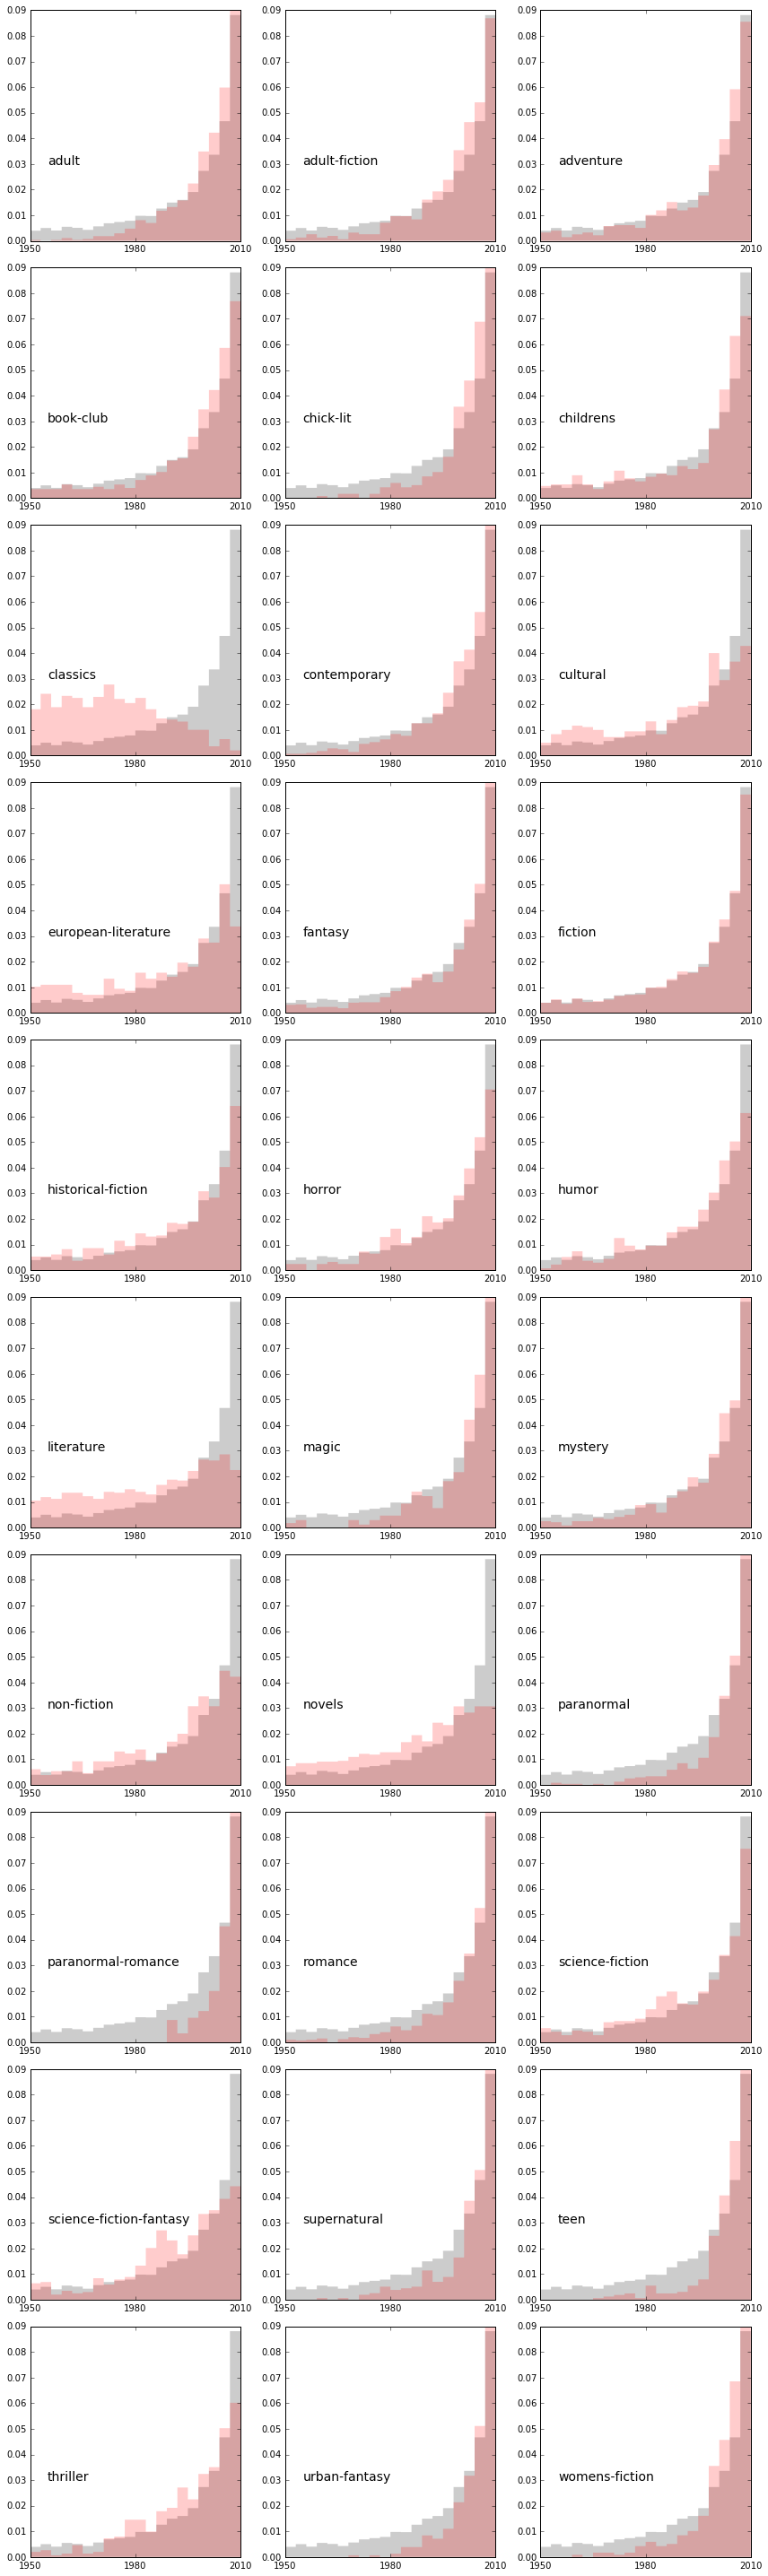

In [63]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(12, 40), 
                         tight_layout=True)
bins = np.arange(1950, 2013, 3)
for ax, genre in zip(axes.ravel(), genres_wanted):
    ax.hist(df[df[genre] == True].year.values, 
            bins=bins, histtype='stepfilled', normed=True, color='r', alpha=.2, ec='none')
    ax.hist(df.year, bins=bins, histtype='stepfilled', ec='None', normed=True, zorder=0, color='#cccccc')
    
    ax.annotate(genre.split(':')[-1], xy=(1955, 3e-2), fontsize=14)
    ax.xaxis.set_ticks(np.arange(1950, 2013, 30))

### Part 6.1: What can you conclude from the above visualizations?

Pick two or three genres and describe how the popularity of these genres fluctuates with time.  

There is a category called Paranormal Romance!!!!!